# Fancy Indexing

In the previous sections, we saw how to access and modify portions of arrays using simple indices `(arr[0])`, `slices(arr[:5])`, and Boolean masks `(arr[arr > 0])`. In this section, we'll llok at another style of array indexing, known as *fancy indexing*. Fancy indexing islike the simple indexing we've already seen, but we pass arrays of indices in place of single scalars. this allows us to very quickly access and modify copmlicated subsets of an array's values.

## Exploring Fancy Indexing

Fancy indexing is conceptually sipmle: it means passing and array of indices to access multiple array elements at once. For example, consider the following array:

In [2]:
import numpy as np 
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [4]:
ind = np.array([[3, 7], [4, 5]])

In [5]:
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions. Consider the following array:

In [6]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with standard indexing, the first index refers to the row, and the second to the column:

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Notice that the first value in the result is `X[0, 2]`, the seconds is `X[1, 1]`, and the third is `X[2, 3]`. The pairing of the indices in fancy indexing follows all the broadcasting rules that were mentioned. So for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [8]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations. For example:

In [9]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

It is always important to remember with fancy indexing that the return value deflects the *broadcasted shape of the indices*, rather than the shape of the array being indexed

## Combined Indexing
For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

In [10]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can also combine fancy indexing with slicing:

In [12]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

And we can combine fancy indexing with masking:

In [14]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

## Example: Selecting Random Points
One common use of fancy indexing is the selection of subsets of rows from a matrix.
For example, we might have an **N** by **D** matrix representing **N** points in **D** dimensions, such as the following points 
draw from a two-dimensional normal distribution:

In [16]:
mean = [0, 0]
cov =  [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

Using the plotting tools, we can visualize these points as a scatter-plot:

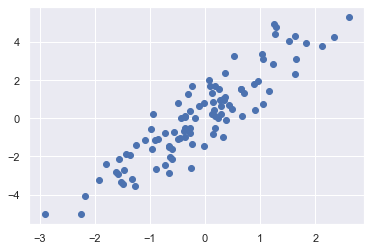

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn; seaborn.set() # for plot styling 
plt.scatter(X[:, 0], X[:, 1])

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repetas, and sue these indices to seelct a portion of original array:

In [19]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([46, 92, 16, 60,  0, 47, 88, 18,  2, 67, 80, 71, 61, 10, 12, 21, 66,
       69, 15,  5])

In [24]:
selection = X[indices] # fancy indexing here 
selection.shape

(20, 2)

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

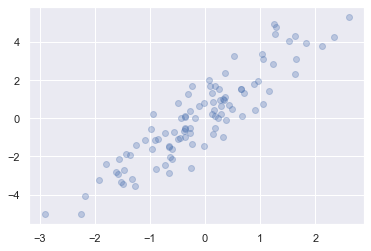

In [29]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200);